In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Probit
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from termcolor import colored
from sklearn.preprocessing import StandardScaler

# Descripción de los Datos
- Name: Nombre de la ventana de tiempo
- Netflows: Cantidad de Netflows en la ventana de tiempo
- First Protocol: Top 1 de los protocolos usados en la ventana de tiempo
- Second_Protocol: Top 2 de los  protocolos usados en la ventana de tiempo
- Third_Protocol: Top 3 de los  protocolos usados en la  ventana de tiempo
- P1_d: Percentil: 25% de todas las duraciones en la ventana de tiempo
- P2_d: Percentil:50% de todas las duraciones en la ventana de tiempo
- P3_d: Percentil:75% de todas las duraciones en la ventana de tiempo
- Duration: Duración total de la ventana de tiempo
- Max_d: Valor máximo de todas las duraciones en la ventana de tiempo
- Min_d: Valor mínimo de todas las duraciones en la ventana de tiempo
- Packets: Número total de paquetes en la ventana de tiempo
- Avg_bps: Promedio de bits por segundo en la ventana de tiempo
- Avg_pps: Promedio de paquetes por segundo en la ventana de tiempo
- Avg_bpp: Promedio de bytes por paquete en la ventana de tiempo
- Bytes: Número total de bytes en la ventana de tiempo
- Number_sp: Número total de puertos de origen usados en la ventana de tiempo
- Number_dp: Número total de puertos de destino usados en la ventana de tiempo
- First_sp: Top 1 de los puertos de origen en la ventana de tiempo
- Second_sp: Top 2 de los puertos de origen en la  ventana de tiempo
- Third_sp: Top 3 de los puertos de origen en la ventana de tiempo
- First_dp: Top 1 de los puertos de destino en la ventana de tiempo
- Second_dp: Top 2 de los puertos de destino en la ventana de tiempo
- Third_dp: Top 3 de los puertos de destino en la ventana de tiempo
- P1_ip: Percentil 25% de todas las entradas de paquetes en la ventana de tiempo
- P2_ip: Percentil 50% de todas las entradas de paquetes en la ventana de tiempo
- P3_ip: Percentil 75% de todas las entradas de paquetes en la ventana de tiempo
- P1_ib: Percentil 25% de todas las entradas de bytes en la ventana de tiempo
- P2_ib: Percentil 50% de todas las entradas de bytes en la ventana de tiempo
- P3_ib: Percentil 75% de todas las entradas de bytes en la ventana de tiempo
- Type: Tipo de ventana de tiempo (Minera/No minera)


# Importar Datos

In [51]:
data = pd.read_csv('./data_identificada.csv')
data.head()

Netflows First_Protocol Second_Protocol Third_Protocol       p1_d  \
0       168            TCP             UDP            NaN    0.00000   
1        30            TCP             UDP            NaN  148.48175   
2       141            TCP             UDP            NaN   13.00500   
3       120            TCP             UDP            NaN   40.34900   
4         8            TCP             UDP            NaN    0.00000   

       p2_d       p3_d   duration    max_d  min_d  ...  second_dp  third_dp  \
0    0.0000    3.00375   1354.823   60.004  0.000  ...       80.0      53.0   
1  164.6610  194.53325   4839.548  273.415  3.002  ...     1900.0   58704.0   
2  104.1780  148.37900  13560.824  201.402  0.000  ...     5355.0    1900.0   
3  103.6845  124.43825  10474.034  166.177  0.000  ...       80.0    1900.0   
4    0.0625    0.31925      2.024    0.916  0.000  ...    37162.0   54856.0   

   p1_ip  p2_ip  p3_ip   p1_ib  p2_ib   p3_ib      Type  Cryptocurrency  
0    1.0    1.0    2.0   32.00   32.0   64.00  not_mine   Does not have  
1    6.0    7.0    8.0  162.75  230.5  312.00  not_mine   Does not have  
2    4.0    5.0    7.0   80.00  160.0  248.00  not_mine   Does not have  
3    4.0    5.0    6.0  128.00  160.0  248.00  not_mine   Does not have  
4    1.0    1.5    4.5   29.75   40.0  197.25  not_mine   Does not have  

[5 rows x 31 columns]

### Agrupación
Agrupación de las variables cuantitativas y categóricas por separado.

In [52]:
data_numeric = (data.dtypes == "int64") | (data.dtypes == "float64")
data_object  = (data.dtypes == "object")
data_numeric = [c for c in data_numeric.index if data_numeric[c]]
data_object = [c for c in data_object.index if data_object[c]]

# Inspección Datos

### Variables Categoricas con respecto a la variable objetivo

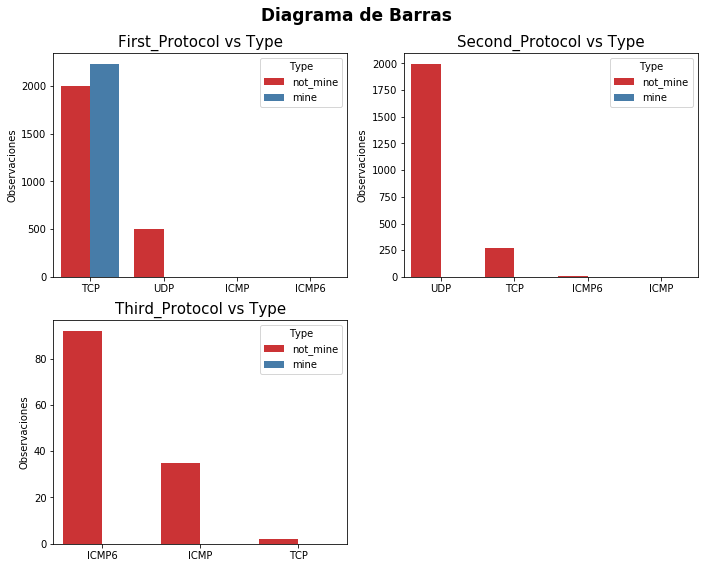

In [53]:
cruce = [('First_Protocol','Type'), ('Second_Protocol','Type'), ('Third_Protocol','Type')]
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))
ax = ax.flat
for i, tupl in enumerate(cruce):
    sns.countplot(x = tupl[0], hue = tupl[1], data=data, palette="Set1", ax = ax[i])
    ax[i].set_title(tupl[0]+" vs "+tupl[1], size = 15)
    ax[i].tick_params(labelsize = 10)
    ax[i].set_ylabel("Observaciones")
    ax[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Diagrama de Barras', fontsize = 17, fontweight = "bold");
fig.delaxes(ax[3])

### Variables Cuantitativas con respecto a la variable objetivo

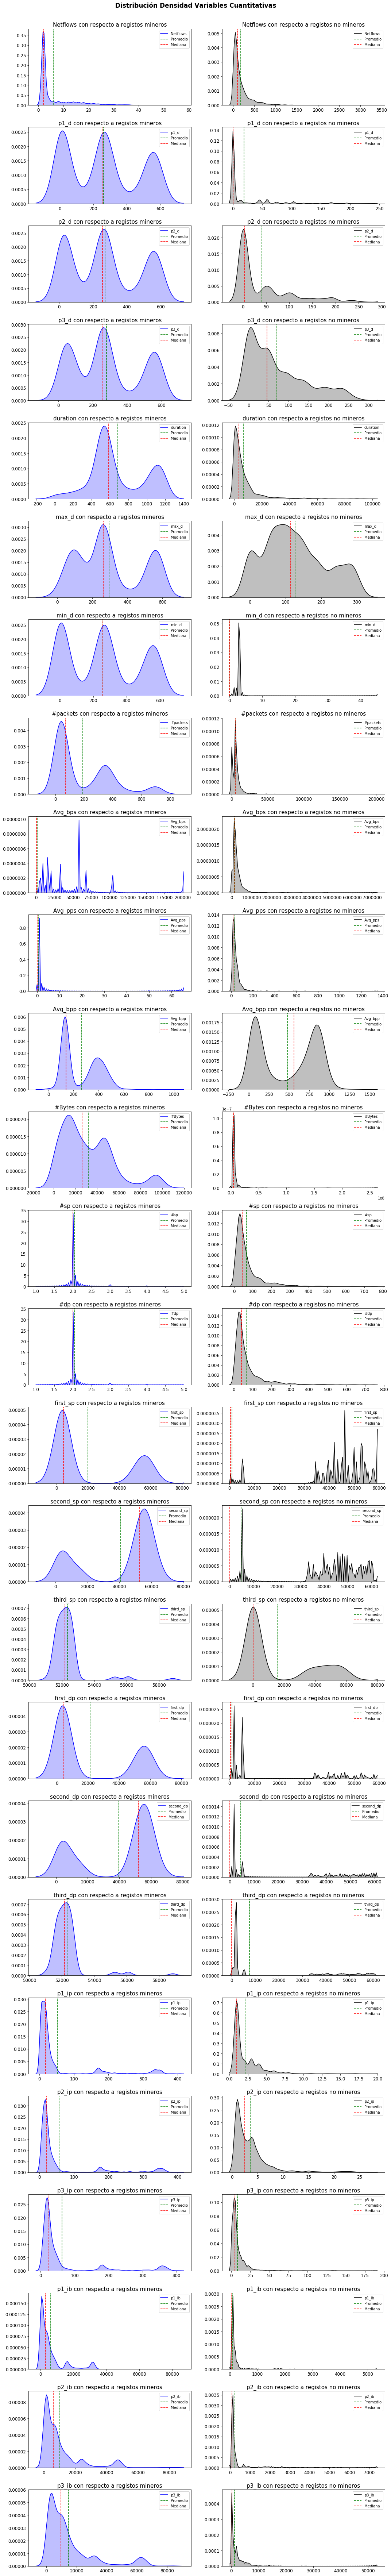

In [54]:
fig, ax = plt.subplots(nrows = 26, ncols = 2, figsize = (15,100))
ax = ax.flat
a = 0
b = 1
for i, col in enumerate(data_numeric):
    if i > 0: 
        a = a+1
        b = b+1
    sns.kdeplot(data[data['Type'] == 'mine'][col], color='blue', shade=True, ax = ax[i+a])
    ax[i+a].axvline(data[data['Type'] == 'mine'][col].mean(), c='green', linestyle = '--', label = 'Promedio')
    ax[i+a].axvline(data[data['Type'] == 'mine'][col].median(), c='red', linestyle = '--', label = 'Mediana')
    ax[i+a].set_title(col+" con respecto a registos mineros", size = 15)
    ax[i+a].tick_params(labelsize = 12)
    ax[i+a].set_xlabel("", size=9)
    ax[i+a].legend()
    
    sns.kdeplot(data[data['Type'] == 'not_mine'][col], color='black', shade=True, ax = ax[i+b])
    ax[i+b].axvline(data[data['Type'] == 'not_mine'][col].mean(), c='green', linestyle = '--', label = 'Promedio')
    ax[i+b].axvline(data[data['Type'] == 'not_mine'][col].median(), c='red', linestyle = '--', label = 'Mediana')
    ax[i+b].set_title(col+" con respecto a registos no mineros", size = 15)
    ax[i+b].tick_params(labelsize = 12)
    ax[i+b].set_xlabel("", size=9)
    ax[i+b].legend()
    

fig.tight_layout()
plt.subplots_adjust(top = 0.97)
fig.suptitle('Distribución Densidad Variables Cuantitativas', fontsize = 17, fontweight = "bold");

In [55]:
data_n = pd.concat([data[data_numeric], data['Type']], axis = 1)
data_n.columns

Index(['Netflows', 'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d',
       '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp',
       'first_sp', 'second_sp', 'third_sp', 'first_dp', 'second_dp',
       'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib',
       'Type'],
      dtype='object')

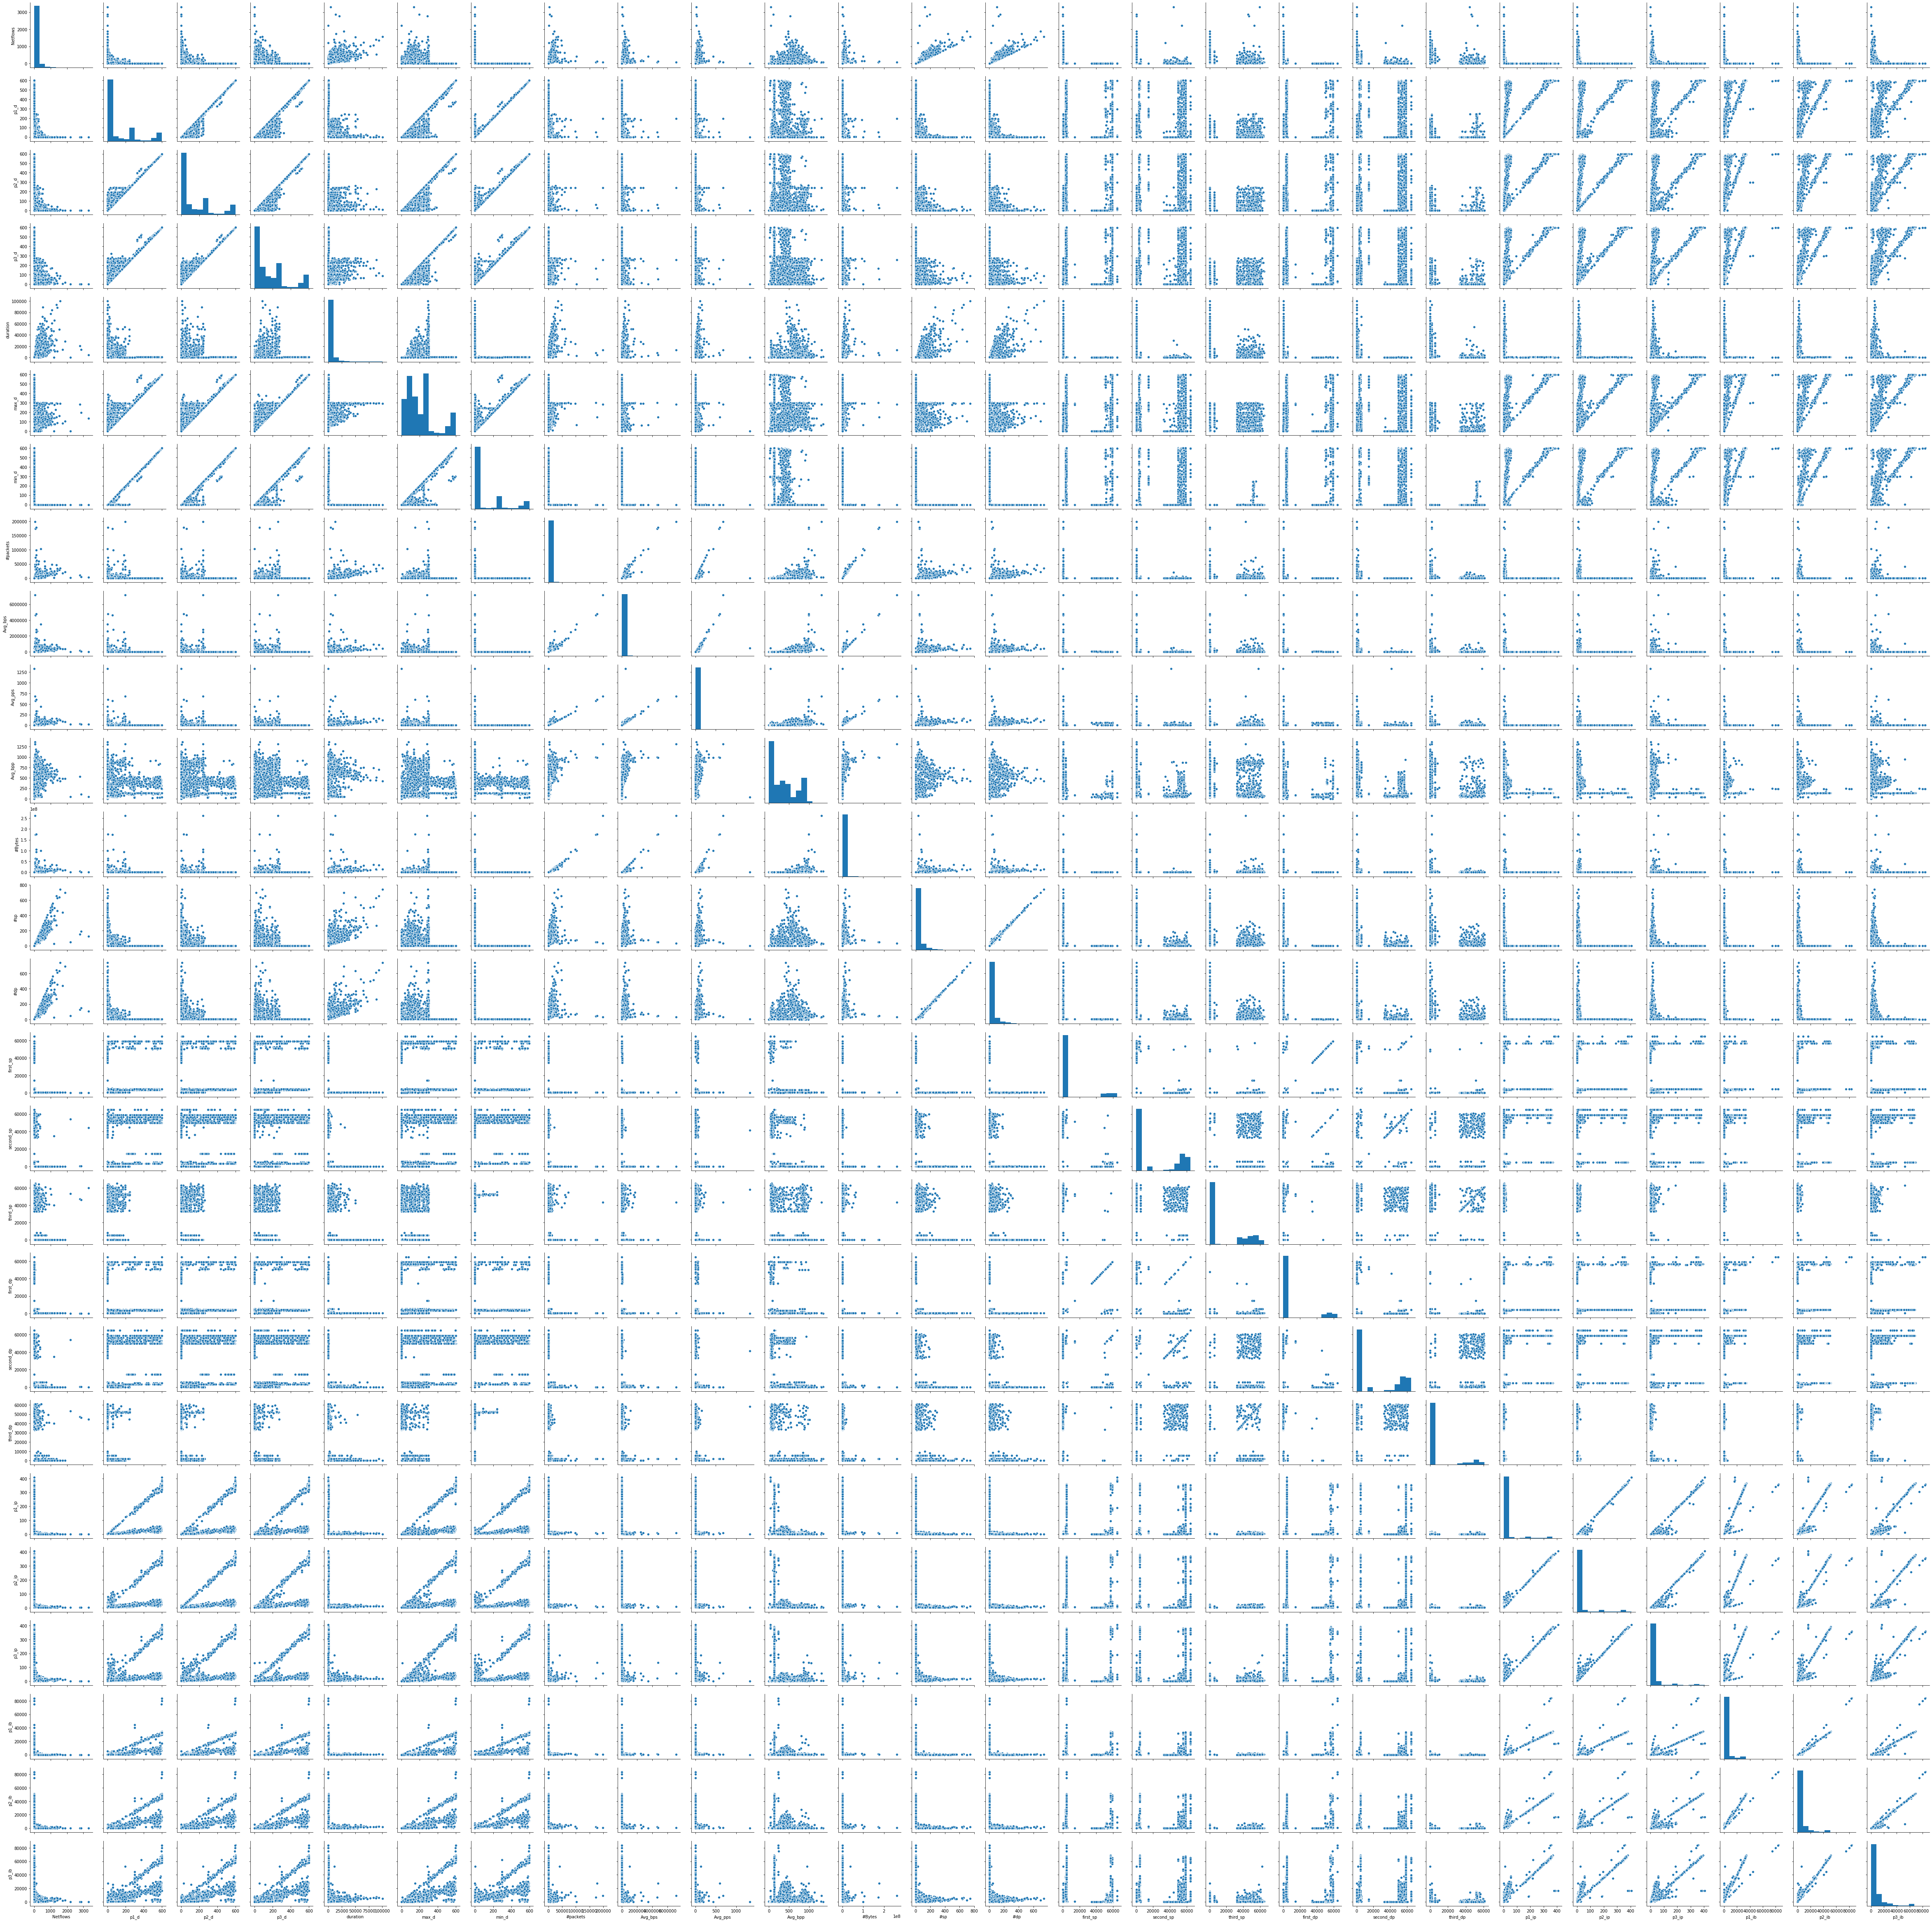

In [56]:
sns.pairplot(data_n)

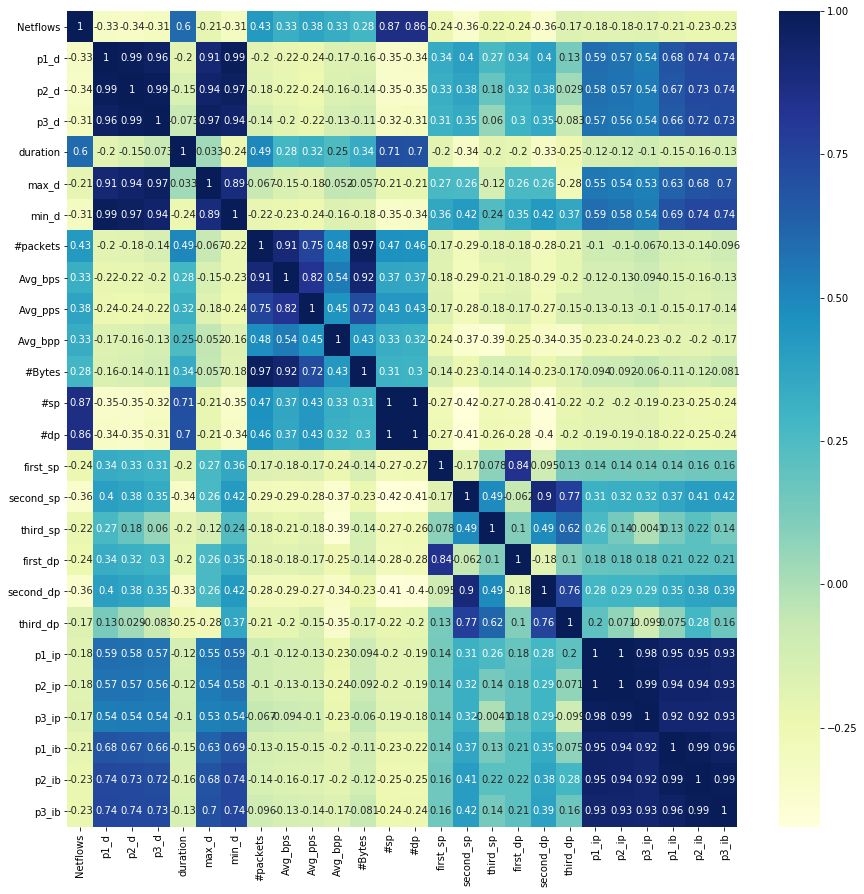

In [57]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")